In [1]:
import os, sys
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
data_path = os.getenv('HOME') + '/aiffel/kaggle_kakr_housing/data'

In [3]:
train_path = os.path.join(data_path, 'train.csv')
test_path = os.path.join(data_path, 'test.csv')

### 1. 데이터 호출

In [4]:
train_data = pd.read_csv(train_path)
test_data = pd.read_csv(test_path)

In [5]:
train_data.columns

Index(['id', 'date', 'price', 'bedrooms', 'bathrooms', 'sqft_living',
       'sqft_lot', 'floors', 'waterfront', 'view', 'condition', 'grade',
       'sqft_above', 'sqft_basement', 'yr_built', 'yr_renovated', 'zipcode',
       'lat', 'long', 'sqft_living15', 'sqft_lot15'],
      dtype='object')

### 2. 데이터 구조

#### 칼럼 확인

In [6]:
train_data.columns

Index(['id', 'date', 'price', 'bedrooms', 'bathrooms', 'sqft_living',
       'sqft_lot', 'floors', 'waterfront', 'view', 'condition', 'grade',
       'sqft_above', 'sqft_basement', 'yr_built', 'yr_renovated', 'zipcode',
       'lat', 'long', 'sqft_living15', 'sqft_lot15'],
      dtype='object')

In [7]:
test_data.columns

Index(['id', 'date', 'bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot',
       'floors', 'waterfront', 'view', 'condition', 'grade', 'sqft_above',
       'sqft_basement', 'yr_built', 'yr_renovated', 'zipcode', 'lat', 'long',
       'sqft_living15', 'sqft_lot15'],
      dtype='object')

#### Price는 test 데이터에 당연히 없다.

In [8]:
set(train_data.columns) - set(test_data.columns)

{'price'}

#### 결측치 확인

In [9]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15035 entries, 0 to 15034
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             15035 non-null  int64  
 1   date           15035 non-null  object 
 2   price          15035 non-null  float64
 3   bedrooms       15035 non-null  int64  
 4   bathrooms      15035 non-null  float64
 5   sqft_living    15035 non-null  int64  
 6   sqft_lot       15035 non-null  int64  
 7   floors         15035 non-null  float64
 8   waterfront     15035 non-null  int64  
 9   view           15035 non-null  int64  
 10  condition      15035 non-null  int64  
 11  grade          15035 non-null  int64  
 12  sqft_above     15035 non-null  int64  
 13  sqft_basement  15035 non-null  int64  
 14  yr_built       15035 non-null  int64  
 15  yr_renovated   15035 non-null  int64  
 16  zipcode        15035 non-null  int64  
 17  lat            15035 non-null  float64
 18  long  

In [10]:
test_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6468 entries, 0 to 6467
Data columns (total 20 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             6468 non-null   int64  
 1   date           6468 non-null   object 
 2   bedrooms       6468 non-null   int64  
 3   bathrooms      6468 non-null   float64
 4   sqft_living    6468 non-null   int64  
 5   sqft_lot       6468 non-null   int64  
 6   floors         6468 non-null   float64
 7   waterfront     6468 non-null   int64  
 8   view           6468 non-null   int64  
 9   condition      6468 non-null   int64  
 10  grade          6468 non-null   int64  
 11  sqft_above     6468 non-null   int64  
 12  sqft_basement  6468 non-null   int64  
 13  yr_built       6468 non-null   int64  
 14  yr_renovated   6468 non-null   int64  
 15  zipcode        6468 non-null   int64  
 16  lat            6468 non-null   float64
 17  long           6468 non-null   float64
 18  sqft_liv

### 3. 데이터 EDA

### 1 ) ID

- 시각화

<AxesSubplot:xlabel='id', ylabel='price'>

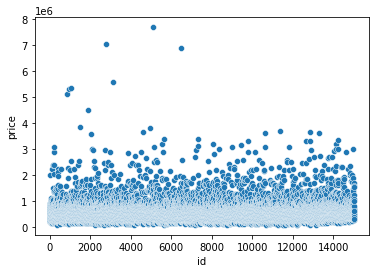

In [11]:
sns.scatterplot(x=train_data['id'], y=train_data['price'])

- 고유번호인지 아닌지 확인하기

In [12]:
(train_data['id'].value_counts().values > 1).sum()

0

#### ID는 각 데이터마다 고유하므로 feature로써의 역할을 할 수 없다. 따라서, 제거한다.

In [13]:
train_data.drop('id', axis=1, inplace=True)

### 2 ) date

- head

In [14]:
train_data['date'].head()

0    20141013T000000
1    20150225T000000
2    20150218T000000
3    20140627T000000
4    20150115T000000
Name: date, dtype: object

- T이하의 문자열은 의미가 없는 문자열이므로 제거한다. 따라서, T이하는 제거한다.

In [15]:
train_data['date'] = train_data['date'].apply(lambda x : x.split('T')[0])

In [16]:
test_data['date'] = test_data['date'].apply(lambda x : x.split('T')[0])

- 시각화

<AxesSubplot:xlabel='date', ylabel='price'>

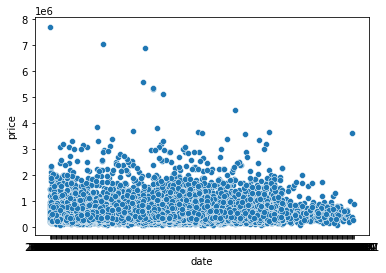

In [17]:
sns.scatterplot(x=train_data['date'], y=train_data['price'])

In [18]:
train_data['date'].value_counts()

20140623    101
20150325     97
20140708     92
20150427     91
20140626     89
           ... 
20140810      1
20140713      1
20141102      1
20141115      1
20140831      1
Name: date, Length: 365, dtype: int64

In [19]:
train_data[['date', 'price']].groupby('date').mean().reset_index()

,date,price
0,20140502,543584.565217
1,20140503,438293.333333
2,20140504,581150.000000
3,20140505,605609.967742
4,20140506,523439.423729
...,...,...
360,20150510,435000.000000
361,20150511,664562.916667
362,20150512,492167.647059
363,20150513,538394.230769


<AxesSubplot:xlabel='date', ylabel='price'>

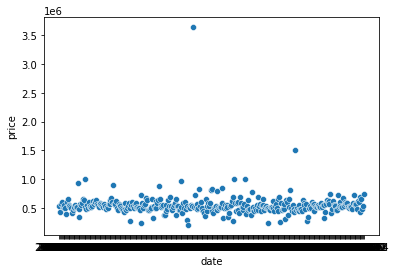

In [20]:
sns.scatterplot(x=train_data[['date', 'price']].groupby('date').mean().reset_index()['date'], y=train_data[['date', 'price']].groupby('date').mean().reset_index()['price'])

- 상관관계

In [21]:
train_data[['date', 'price']].groupby('date').mean().reset_index().astype('int').corr()

,date,price
date,1.000000,-0.040277
price,-0.040277,1.000000


#### 마땅한 상관관계를 보이진 않는다. 연, 월, 일을 구분지은 후, date 칼럼은 제거한다.

In [22]:
train_data['date'] = pd.to_datetime(train_data['date'])

In [23]:
test_data['date'] = pd.to_datetime(test_data['date'])

In [24]:
train_data['year'] = train_data['date'].dt.year
train_data['month'] = train_data['date'].dt.month
train_data['day'] = train_data['date'].dt.day

In [25]:
test_data['year'] = test_data['date'].dt.year
test_data['month'] = test_data['date'].dt.month
test_data['day'] = test_data['date'].dt.day

In [26]:
train_data.drop('date', axis=1, inplace=True)
test_data.drop('date', axis=1, inplace=True)

In [27]:
train_data.head()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,...,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,year,month,day
0,221900.0,3,1.00,1180,5650,1.0,0,0,3,7,...,1955,0,98178,47.5112,-122.257,1340,5650,2014,10,13
1,180000.0,2,1.00,770,10000,1.0,0,0,3,6,...,1933,0,98028,47.7379,-122.233,2720,8062,2015,2,25
2,510000.0,3,2.00,1680,8080,1.0,0,0,3,8,...,1987,0,98074,47.6168,-122.045,1800,7503,2015,2,18
3,257500.0,3,2.25,1715,6819,2.0,0,0,3,7,...,1995,0,98003,47.3097,-122.327,2238,6819,2014,6,27
4,291850.0,3,1.50,1060,9711,1.0,0,0,3,7,...,1963,0,98198,47.4095,-122.315,1650,9711,2015,1,15


In [28]:
test_data.head()

,id,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,...,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,year,month,day
0,15035,3,2.25,2570,7242,2.0,0,0,3,7,...,1951,1991,98125,47.7210,-122.319,1690,7639,2014,12,9
1,15036,4,3.00,1960,5000,1.0,0,0,5,7,...,1965,0,98136,47.5208,-122.393,1360,5000,2014,12,9
2,15037,4,4.50,5420,101930,1.0,0,0,3,11,...,2001,0,98053,47.6561,-122.005,4760,101930,2014,5,12
3,15038,3,1.00,1780,7470,1.0,0,0,3,7,...,1960,0,98146,47.5123,-122.337,1780,8113,2015,4,15
4,15039,3,2.50,1890,6560,2.0,0,0,3,7,...,2003,0,98038,47.3684,-122.031,2390,7570,2015,3,12


### 3 ) year, month, day

- 시각화

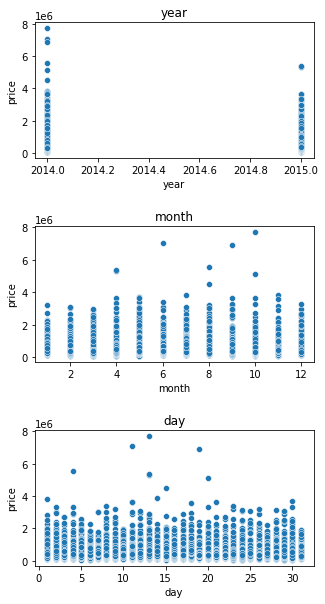

In [29]:
fig, ax = plt.subplots(3, 1,figsize=(5,10))
plt.subplots_adjust(hspace=0.5)

for idx, i in enumerate(['year', 'month', 'day']):
    sns.scatterplot(x=train_data[i], y=train_data['price'], ax=ax[idx])
    ax[idx].set_title(i)

- 상관관계

In [30]:
train_data[['year', 'price']].corr()

,year,price
year,1.000000,0.008012
price,0.008012,1.000000


In [31]:
train_data[['month', 'price']].corr()

,month,price
month,1.000000,-0.010352
price,-0.010352,1.000000


In [32]:
train_data[['day', 'price']].corr()

,day,price
day,1.000000,-0.013625
price,-0.013625,1.000000


#### 연, 월, 일 분리해서 EDA를 진행하여도 price와 상관관계가 딱히 없어보인다.
#### 구매 연도, 월, 일은 집 가격과 관계가 없는 것은 어쩌면 당연할 것이다. 따라서, 이 칼럼들을 제거한다.

In [33]:
# train_data.drop(['year', 'month', 'day'], axis=1, inplace=True)
# test_data.drop(['year', 'month', 'day'], axis=1, inplace=True)

### 4 ) bedrooms

<AxesSubplot:xlabel='bedrooms', ylabel='price'>

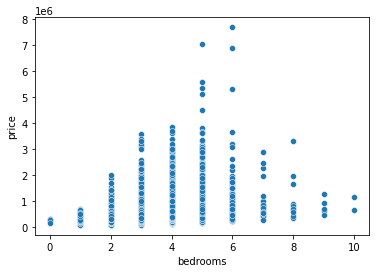

In [34]:
sns.scatterplot(x=train_data['bedrooms'], y=train_data['price'])

In [35]:
train_data['bedrooms'].value_counts()

3     6835
4     4797
2     1931
5     1108
6      188
1      133
7       22
8       10
9        5
0        4
10       2
Name: bedrooms, dtype: int64

- 방의 개수에 따른 데이터 분포 : 3을 기준으로 어느정도의 정규분포를 따르는듯 보인다.

<AxesSubplot:ylabel='Density'>

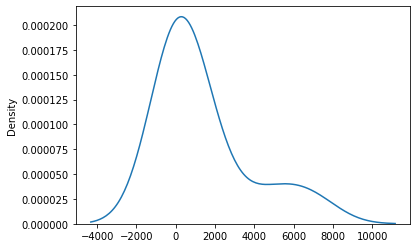

In [36]:
sns.kdeplot(train_data.groupby('bedrooms').count()['price'].values)

- 방의 개수에 따른 가격 평균

In [37]:
train_data.groupby('bedrooms').mean().reset_index()[['bedrooms','price']]

,bedrooms,price
0,0,2.405000e+05
1,1,3.102892e+05
2,2,3.992137e+05
3,3,4.657418e+05
4,4,6.340614e+05
5,5,8.022583e+05
6,6,8.714031e+05
7,7,9.669480e+05
8,8,1.135300e+06
9,9,7.927998e+05


- 방의 개수와 그에 따른 칼럼간의 상관관계

In [38]:
train_data.groupby('bedrooms').mean()

,price,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,...,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,year,month,day
bedrooms,,,,,,,,,,,,,,,,,,,,,
0,2.405000e+05,0.812500,908.500000,61557.500000,1.500000,0.000000,0.000000,2.500000,4.750000,908.500000,...,1990.250000,0.000000,98056.000000,47.500275,-122.008250,1525.000000,64766.500000,2014.250000,8.250000,24.000000
1,3.102892e+05,1.075188,864.045113,17194.375940,1.172932,0.015038,0.218045,3.218045,6.105263,802.691729,...,1942.744361,209.616541,98102.781955,47.570514,-122.254060,1450.857143,15541.984962,2014.300752,7.030075,16.187970
2,3.992137e+05,1.403030,1239.030554,11983.236665,1.307613,0.011393,0.193164,3.376489,6.863801,1107.866390,...,1955.648887,76.208700,98106.250647,47.589300,-122.279112,1510.342828,9769.856033,2014.317452,6.621440,15.792336
3,4.657418e+05,1.965655,1809.154792,14598.106218,1.451134,0.006437,0.185662,3.410680,7.470373,1589.852670,...,1971.809217,74.791222,98076.813168,47.552356,-122.213241,1838.243892,12917.986979,2014.324653,6.562838,15.720263
4,6.340614e+05,2.440327,2558.205754,16922.527830,1.620909,0.004378,0.258703,3.399625,8.126329,2206.496560,...,1976.865332,86.262456,98069.411090,47.555805,-122.188721,2298.383782,13615.717115,2014.312279,6.589327,15.690848
5,8.022583e+05,2.784973,3070.231047,17592.584838,1.592509,0.013538,0.433213,3.461191,8.302347,2424.307762,...,1974.121841,104.662455,98070.237365,47.577156,-122.199591,2470.368231,13423.145307,2014.324007,6.558664,15.425993
6,8.714031e+05,3.062500,3321.031915,16729.526596,1.643617,0.015957,0.590426,3.569149,8.154255,2508.648936,...,1962.436170,180.313830,98079.627660,47.580821,-122.243723,2280.595745,13724.425532,2014.361702,6.244681,14.978723
7,9.669480e+05,3.613636,4071.363636,26449.272727,1.750000,0.000000,0.636364,3.454545,8.454545,3261.363636,...,1956.227273,363.863636,98087.045455,47.614241,-122.247727,2324.545455,19544.045455,2014.227273,6.818182,16.045455
8,1.135300e+06,3.225000,3941.000000,9192.200000,1.700000,0.000000,0.300000,3.700000,8.200000,2552.000000,...,1950.900000,0.000000,98088.300000,47.646400,-122.278400,2412.000000,7900.500000,2014.100000,8.500000,16.500000


<AxesSubplot:>

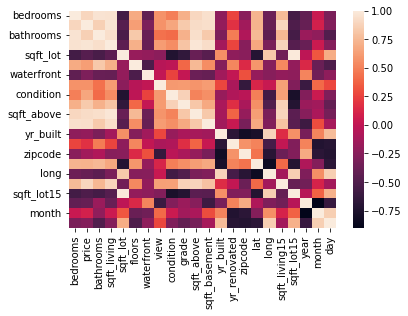

In [39]:
sns.heatmap(train_data.groupby('bedrooms').mean().reset_index().corr())

- 방의 개수와 상관관계가 0.89이상인 칼럼들 : 방의 크기는 예상했듯이 가격과 화장실의 개수, 그리고 부지의 면적과 높은 상관관계가 존재한다.

In [40]:
abs(train_data.groupby('bedrooms').mean().reset_index().corr()['bedrooms']) > 0.89

bedrooms          True
price             True
bathrooms         True
sqft_living       True
sqft_lot         False
floors           False
waterfront       False
view             False
condition        False
grade            False
sqft_above        True
sqft_basement     True
yr_built         False
yr_renovated     False
zipcode          False
lat              False
long             False
sqft_living15    False
sqft_lot15       False
year             False
month            False
day              False
Name: bedrooms, dtype: bool

In [41]:
train_data.groupby('bedrooms').mean().reset_index().corr()['bedrooms'].loc['price']

0.8922475137899295

In [42]:
train_data[['bedrooms', 'price']].corr()

,bedrooms,price
bedrooms,1.000000,0.323672
price,0.323672,1.000000


#### 해석 : 방의 개수는 가격과 분명한 상관관계가 존재하지만, 큰 노이즈로 작용하는 것들이 있다.

### 5 ) bathrooms

<AxesSubplot:xlabel='bathrooms', ylabel='price'>

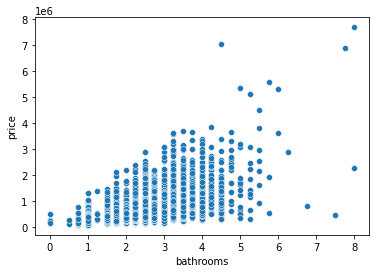

In [43]:
sns.scatterplot(x=train_data['bathrooms'], y=train_data['price'])

In [44]:
train_data['bathrooms'].value_counts()

2.50    3748
1.00    2675
1.75    2112
2.25    1433
2.00    1357
1.50    1009
2.75     843
3.50     510
3.00     493
3.25     410
3.75     108
4.00     100
4.50      64
4.25      57
0.75      45
4.75      16
5.00      14
5.25      11
5.50       7
1.25       5
0.00       4
0.50       3
5.75       3
6.00       2
8.00       2
6.75       1
7.50       1
7.75       1
6.25       1
Name: bathrooms, dtype: int64

- 화장실의 개수에 따른 데이터 분포 : 3을 기준으로 어느정도의 정규분포를 따르는듯 보인다.

<AxesSubplot:ylabel='Density'>

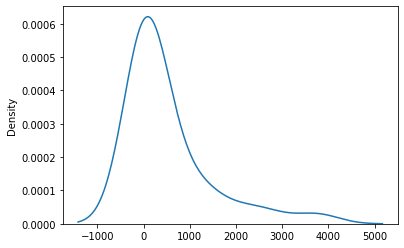

In [45]:
sns.kdeplot(train_data.groupby('bathrooms').count()['price'].values)

In [46]:
train_data.groupby('bathrooms').mean().reset_index()[['bathrooms','price']]

,bathrooms,price
0,0.00,2.852500e+05
1,0.50,2.123333e+05
2,0.75,2.812389e+05
3,1.00,3.469929e+05
4,1.25,6.082900e+05
5,1.50,4.052911e+05
6,1.75,4.516214e+05
7,2.00,4.628095e+05
8,2.25,5.309718e+05
9,2.50,5.558889e+05


<AxesSubplot:>

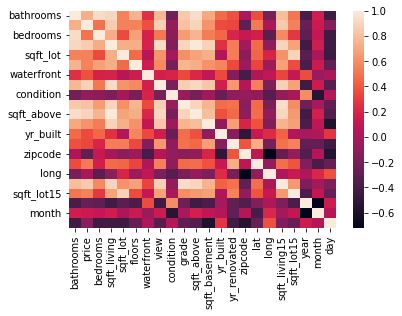

In [47]:
sns.heatmap(train_data.groupby('bathrooms').mean().reset_index().corr())

In [48]:
abs(train_data.groupby('bathrooms').mean().reset_index().corr()['bathrooms']) > 0.89

bathrooms         True
price            False
bedrooms          True
sqft_living       True
sqft_lot         False
floors           False
waterfront       False
view             False
condition        False
grade            False
sqft_above        True
sqft_basement    False
yr_built         False
yr_renovated     False
zipcode          False
lat              False
long             False
sqft_living15    False
sqft_lot15       False
year             False
month            False
day              False
Name: bathrooms, dtype: bool

In [49]:
train_data[['bathrooms', 'price']].corr()

,bathrooms,price
bathrooms,1.000000,0.525479
price,0.525479,1.000000


#### 해석 : 화장실의 개수는 가격과 상관관계가 존재한다고 볼 수 있다.

### 6 ) sqft_living, sqft_above, sqft_basement

In [50]:
(train_data['sqft_living'] == train_data['sqft_above'] + train_data['sqft_basement']).all()

True

In [51]:
train_data[['sqft_living', 'price']].corr()

,sqft_living,price
sqft_living,1.000000,0.702899
price,0.702899,1.000000


/opt/conda/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='sqft_living', ylabel='price'>

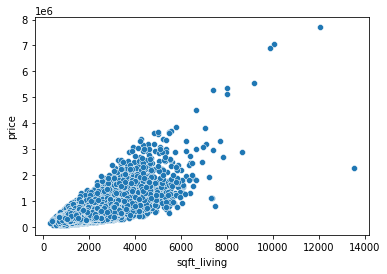

In [52]:
sns.scatterplot(train_data['sqft_living'], train_data['price'])

In [53]:
train_data[train_data['sqft_living'] > 13000]

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,...,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,year,month,day
8912,2280000.0,7,8.0,13540,307752,3.0,0,4,3,12,...,1999,0,98053,47.6675,-121.986,4850,217800,2014,5,5


#### 아웃라이어 제거

In [54]:
train_data.drop(train_data[train_data['sqft_living'] > 13000].index, inplace=True)

In [55]:
train_data.reset_index(drop=True, inplace = True)

/opt/conda/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='sqft_living', ylabel='price'>

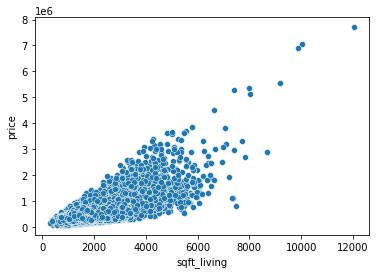

In [56]:
sns.scatterplot(train_data['sqft_living'], train_data['price'])

In [57]:
train_data[['sqft_living', 'price']].corr()

,sqft_living,price
sqft_living,1.000000,0.703159
price,0.703159,1.000000


#### 주거공간의 면적 * 화장실의 개수가 가격과의 상관관계가 높다

In [58]:
np.corrcoef(train_data['sqft_living'] * train_data['bedrooms'], train_data['price'])

array([[1.        , 0.64816027],
       [0.64816027, 1.        ]])

In [59]:
np.corrcoef(train_data['sqft_living'] * train_data['bathrooms'], train_data['price'])

array([[1.        , 0.71965852],
       [0.71965852, 1.        ]])

#### 이를 새로운 feature로 생성

In [60]:
train_data['bath_sqft'] = train_data['sqft_living'] * train_data['bathrooms']
test_data['bath_sqft'] = test_data['sqft_living'] * test_data['bathrooms']

#### sqft_living 칼럼은 sqft_above와 sqft_basement의 선형결합으로 이루어진다. 따라서, 제거한다.

In [61]:
train_data.drop('sqft_living', axis=1, inplace=True)
test_data.drop('sqft_living', axis=1, inplace=True)

In [62]:
train_data.columns

Index(['price', 'bedrooms', 'bathrooms', 'sqft_lot', 'floors', 'waterfront',
       'view', 'condition', 'grade', 'sqft_above', 'sqft_basement', 'yr_built',
       'yr_renovated', 'zipcode', 'lat', 'long', 'sqft_living15', 'sqft_lot15',
       'year', 'month', 'day', 'bath_sqft'],
      dtype='object')

### 7 ) sqft_lot : 부지의 평방면적과 가격은 상관관계가 존재하는가?

In [63]:
train_data[['sqft_lot', 'price']].corr()

,sqft_lot,price
sqft_lot,1.000000,0.094873
price,0.094873,1.000000


#### 마땅한 상관관계를 보이는 것 같진 않다.

### 8 ) floors : 집의 층수와 가격은 상관관계가 존재하는가?

/opt/conda/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='floors', ylabel='price'>

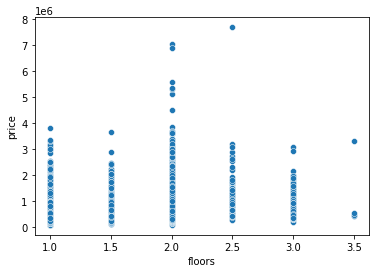

In [64]:
sns.scatterplot(train_data['floors'], train_data['price'])

In [65]:
train_data[['floors','price']].corr()

,floors,price
floors,1.000000,0.261978
price,0.261978,1.000000


#### 해석 : 집의 층수와 집 값의 평균은 상관관계가 존재하지만 이를 낮추는 요인이 존재한다.

### 9 ) waterfront : 리버뷰가 가격에 영향을 미치는가? 그렇다.

In [66]:
train_data[['waterfront', 'price']]

,waterfront,price
0,0,221900.0
1,0,180000.0
2,0,510000.0
3,0,257500.0
4,0,291850.0
...,...,...
15029,0,610685.0
15030,0,1007500.0
15031,0,360000.0
15032,0,400000.0


In [67]:
train_data['waterfront'].value_counts()

0    14927
1      107
Name: waterfront, dtype: int64

- 평균적으로 리버뷰가 있으면 가격이 높다.

<AxesSubplot:xlabel='waterfront', ylabel='price'>

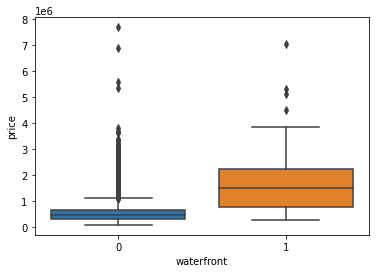

In [68]:
sns.boxplot(x = train_data['waterfront'], y=train_data['price'])

#### 그렇다면, 리버뷰이면서 실거주면적이 크다면 가격이 높을까? 그렇다.

In [69]:
np.corrcoef(train_data['waterfront'] * (train_data['sqft_above'] + train_data['sqft_basement']), train_data['price'])

array([[1.        , 0.34272909],
       [0.34272909, 1.        ]])

#### 이를 새로운 feature로 생성

In [70]:
train_data['water_sqft'] = train_data['waterfront'] * (train_data['sqft_above'] + train_data['sqft_basement'])
test_data['water_sqft'] = test_data['waterfront'] * (test_data['sqft_above'] + test_data['sqft_basement'])

### 10 ) view, condition, grade

#### 첫 인상으로는 다같은거 아닌가라는 생각이 든다.
#### 집이 얼마나 좋아보이는지의 정도인 view와 집의 상태인 condition, 시스템 기준으로 매긴 집의 등급인 grade는 상호 상관관계가 매우 높을 것이라고 생각하였다.

In [71]:
train_data[['view', 'condition', 'grade']].corr()

,view,condition,grade
view,1.000000,0.045498,0.247029
condition,0.045498,1.000000,-0.143512
grade,0.247029,-0.143512,1.000000


#### 그러나, 상관관계 분석시 강한 상관관계를 가지진 않았다.

In [72]:
train_data[['view', 'price']].corr()

,view,price
view,1.000000,0.399885
price,0.399885,1.000000


In [73]:
train_data[['condition', 'price']].corr()

,condition,price
condition,1.000000,0.039965
price,0.039965,1.000000


In [74]:
train_data[['grade', 'price']].corr()

,grade,price
grade,1.000000,0.666852
price,0.666852,1.000000


#### 또한, 놀랍게도 집의 전반적인 상태를 나타내는 칼럼인 condition이 집값 가격과 상관관계가 거의 없었다.

In [75]:
train_data.columns

Index(['price', 'bedrooms', 'bathrooms', 'sqft_lot', 'floors', 'waterfront',
       'view', 'condition', 'grade', 'sqft_above', 'sqft_basement', 'yr_built',
       'yr_renovated', 'zipcode', 'lat', 'long', 'sqft_living15', 'sqft_lot15',
       'year', 'month', 'day', 'bath_sqft', 'water_sqft'],
      dtype='object')

### 11 ) yr_built

<AxesSubplot:xlabel='yr_built', ylabel='price'>

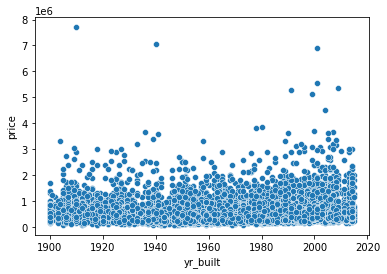

In [76]:
sns.scatterplot(x=train_data['yr_built'], y=train_data['price'])

In [77]:
np.corrcoef(train_data['yr_built'], train_data['price'])

array([[1.        , 0.04703058],
       [0.04703058, 1.        ]])

In [78]:
np.corrcoef(train_data['yr_renovated'], train_data['price'])

array([[1.        , 0.14097617],
       [0.14097617, 1.        ]])

#### 집이 지어진 연도도 집의 가격과 큰 상관관계가 없었다.

#### 혹시, 집이 재건축 되었다면, 그 연도를 기준으로 상관관계를 분석하면 있지 않을까?

In [79]:
len(train_data)

15034

In [80]:
train_data

,price,bedrooms,bathrooms,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,...,zipcode,lat,long,sqft_living15,sqft_lot15,year,month,day,bath_sqft,water_sqft
0,221900.0,3,1.00,5650,1.0,0,0,3,7,1180,...,98178,47.5112,-122.257,1340,5650,2014,10,13,1180.00,0
1,180000.0,2,1.00,10000,1.0,0,0,3,6,770,...,98028,47.7379,-122.233,2720,8062,2015,2,25,770.00,0
2,510000.0,3,2.00,8080,1.0,0,0,3,8,1680,...,98074,47.6168,-122.045,1800,7503,2015,2,18,3360.00,0
3,257500.0,3,2.25,6819,2.0,0,0,3,7,1715,...,98003,47.3097,-122.327,2238,6819,2014,6,27,3858.75,0
4,291850.0,3,1.50,9711,1.0,0,0,3,7,1060,...,98198,47.4095,-122.315,1650,9711,2015,1,15,1590.00,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15029,610685.0,4,2.50,6023,2.0,0,0,3,9,2520,...,98056,47.5137,-122.167,2520,6023,2014,10,14,6300.00,0
15030,1007500.0,4,3.50,7200,2.0,0,0,3,9,2600,...,98136,47.5537,-122.398,2050,6200,2015,3,26,12285.00,0
15031,360000.0,3,2.50,1131,3.0,0,0,3,8,1530,...,98103,47.6993,-122.346,1530,1509,2014,5,21,3825.00,0
15032,400000.0,4,2.50,5813,2.0,0,0,3,8,2310,...,98146,47.5107,-122.362,1830,7200,2015,2,23,5775.00,0


In [81]:
for i in range(len(train_data)):
    if train_data.loc[i,'yr_renovated'] != 0:
        train_data.loc[i,'yr_new'] = train_data.loc[i,'yr_renovated']
    else:
        train_data.loc[i,'yr_new'] = train_data.loc[i,'yr_built']

In [82]:
train_data[['yr_new', 'price']].corr()

,yr_new,price
yr_new,1.000000,0.102349
price,0.102349,1.000000


#### 큰 상관관계가 없었다.

In [83]:
train_data.drop('yr_new', axis=1, inplace=True)

### 12 ) zipcode

In [84]:
train_data['zipcode'].value_counts()

98103    421
98038    420
98115    408
98052    408
98117    387
        ... 
98102     75
98010     63
98024     54
98148     44
98039     36
Name: zipcode, Length: 70, dtype: int64

In [85]:
train_data.groupby('zipcode').mean().sort_values(by='price')

,price,bedrooms,bathrooms,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,...,yr_renovated,lat,long,sqft_living15,sqft_lot15,year,month,day,bath_sqft,water_sqft
zipcode,,,,,,,,,,,,,,,,,,,,,
98002,2.356645e+05,3.320611,1.828244,7352.977099,1.351145,0.000000,0.000000,3.755725,6.702290,1531.557252,...,60.488550,47.308214,-122.213122,1482.992366,7735.290076,2014.297710,6.717557,16.931298,3316.015267,0.000000
98168,2.368372e+05,2.967568,1.425676,11906.589189,1.156757,0.000000,0.010811,3.248649,6.470270,1229.675676,...,85.864865,47.490172,-122.308227,1474.756757,9969.583784,2014.248649,6.864865,15.513514,2316.013514,0.000000
98032,2.554184e+05,3.447059,1.729412,10694.341176,1.205882,0.000000,0.094118,3.682353,7.176471,1452.070588,...,23.682353,47.372648,-122.281035,1697.282353,9484.282353,2014.282353,6.929412,16.894118,3402.905882,0.000000
98001,2.724696e+05,3.368201,1.987448,13400.485356,1.418410,0.000000,0.075314,3.334728,7.238494,1655.472803,...,49.682008,47.309264,-122.270138,1795.138075,10994.389121,2014.338912,6.548117,16.728033,3898.778243,0.000000
98023,2.820046e+05,3.449857,2.069484,10358.908309,1.322350,0.002865,0.103152,3.389685,7.570201,1696.232092,...,22.808023,47.308664,-122.364206,1963.097421,9399.352436,2014.329513,6.601719,16.045845,4451.512178,10.343840
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
98102,9.043680e+05,3.333333,2.280000,3845.853333,1.986667,0.000000,0.160000,3.360000,8.280000,1733.866667,...,132.640000,47.633473,-122.321947,1944.800000,3317.853333,2014.266667,7.053333,16.906667,5879.266667,0.000000
98112,1.118553e+06,3.531073,2.399718,4923.717514,1.822034,0.000000,0.169492,3.497175,8.480226,2002.525424,...,248.745763,47.629708,-122.297718,2330.214689,4889.463277,2014.248588,7.022599,15.220339,6809.980226,0.000000
98040,1.204216e+06,4.015544,2.751295,14478.393782,1.541451,0.036269,0.844560,3.803109,9.062176,2513.264249,...,186.046632,47.559558,-122.225420,2958.580311,12999.093264,2014.326425,6.290155,16.020725,9542.930052,166.165803


In [86]:
train_data.groupby('zipcode').mean().sort_values(by='price').corr()

,price,bedrooms,bathrooms,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,...,yr_renovated,lat,long,sqft_living15,sqft_lot15,year,month,day,bath_sqft,water_sqft
price,1.000000,0.512603,0.732672,-0.059450,0.389489,0.087156,0.352887,0.171811,0.817470,0.614390,...,0.684609,0.433608,-0.015469,0.662429,-0.038725,-0.425320,0.281229,-0.288486,0.834654,0.269947
bedrooms,0.512603,1.000000,0.759120,-0.107151,0.120427,-0.141775,-0.115824,0.162374,0.728153,0.746341,...,-0.003576,0.078744,0.353406,0.821759,-0.091031,-0.007619,-0.037652,-0.140654,0.753967,0.045977
bathrooms,0.732672,0.759120,1.000000,0.135499,0.584710,0.003090,0.061341,-0.106918,0.926669,0.921369,...,0.203779,0.202185,0.456200,0.925551,0.150169,-0.208151,0.084484,-0.259118,0.942555,0.135811
sqft_lot,-0.059450,-0.107151,0.135499,1.000000,0.004450,0.359924,0.180451,-0.147593,0.042807,0.333611,...,0.038860,-0.164434,0.537409,0.190089,0.992472,-0.088034,0.092165,0.189573,0.179837,0.261667
floors,0.389489,0.120427,0.584710,0.004450,1.000000,-0.119915,-0.094952,-0.321607,0.545022,0.418735,...,0.134284,0.256707,0.268284,0.383491,-0.000647,-0.159554,0.046928,-0.255568,0.401150,-0.136056
waterfront,0.087156,-0.141775,0.003090,0.359924,-0.119915,1.000000,0.624212,0.242918,-0.000040,0.030200,...,0.245867,-0.103291,-0.241060,0.031266,0.352641,-0.226616,0.078420,0.150390,0.053301,0.943688
view,0.352887,-0.115824,0.061341,0.180451,-0.094952,0.624212,1.000000,0.361967,0.154540,0.016933,...,0.568102,-0.001062,-0.278893,0.096908,0.174482,-0.122000,0.009989,0.071498,0.175327,0.688109
condition,0.171811,0.162374,-0.106918,-0.147593,-0.321607,0.242918,0.361967,1.000000,0.014289,-0.176205,...,0.220167,-0.125782,-0.388827,-0.053227,-0.146774,-0.100016,0.078936,0.141181,-0.026822,0.318709
grade,0.817470,0.728153,0.926669,0.042807,0.545022,-0.000040,0.154540,0.014289,1.000000,0.850028,...,0.301730,0.338125,0.287811,0.917974,0.060105,-0.279655,0.147398,-0.280279,0.908567,0.144223
sqft_above,0.614390,0.746341,0.921369,0.333611,0.418735,0.030200,0.016933,-0.176205,0.850028,1.000000,...,0.127531,0.124069,0.602699,0.950790,0.350246,-0.182092,0.058229,-0.176058,0.927374,0.150269


#### zip code 그 자체만으로는 큰 의미가 없어보인다.

### 13 ) lat, long

#### 위도, 경도 데이터로써 반드시 가격과 상관관계가 존재할 것으로 예상된다.

In [87]:
import folium

#### 상위 100개 가격 집 시각화 ( 단, 집의 가격은 집의 평방면적에 의존하므로 이를 나눔으로써 스케일링 시킨다 )

In [88]:
train_data['sqrt_price'] = train_data['price'] / (train_data['sqft_above'] + train_data['sqft_basement'])

In [89]:
train_data.sort_values(by='sqrt_price', ascending=False)[['lat', 'long']][:100]

,lat,long
2852,47.5884,-122.086
7297,47.6380,-122.288
6042,47.5077,-122.357
12923,47.3509,-122.323
5156,47.5716,-122.204
...,...,...
14115,47.6364,-122.214
4598,47.6515,-122.277
2365,47.6776,-122.361
1022,47.7345,-122.285


In [90]:
m = folium.Map(location=train_data.sort_values(by='sqrt_price', ascending=False)[['lat', 'long']][:100].values[0],
               zoom_start=9, 
               width=750, 
               height=500
              )
for i in train_data.sort_values(by='sqrt_price', ascending=False)[['lat', 'long']][:100].values:
    folium.Marker([i[0], i[1]],).add_to(m)
m

#### 하위 100개 시각화

In [91]:
m = folium.Map(location=train_data.sort_values(by='sqrt_price')[['lat', 'long']][:100].values[0],
               zoom_start=9, 
               width=750, 
               height=500
              )
for i in train_data.sort_values(by='sqrt_price')[['lat', 'long']][:100].values:
    folium.Marker([i[0], i[1]],).add_to(m)
m

#### 상대적으로 비싼 집들은 씨애틀 쪽에 많이 위치되어 있는 것처럼 보인다.

In [92]:
m = folium.Map(location=train_data.sort_values(by='sqrt_price')[['lat', 'long']][:100].values[0],
               zoom_start=9, 
               width=750, 
               height=500
              )

for idx,i in enumerate(train_data.sort_values(by='sqrt_price', ascending=False)[['lat', 'long']][:100].values):
    folium.Marker([i[0], i[1]], 
              popup=i,
              tooltip=idx, icon=folium.Icon('red')).add_to(m)
    
for i in train_data.sort_values(by='sqrt_price')[['lat', 'long']][:100].values:
    folium.Marker([i[0], i[1]],).add_to(m)
m

#### 이를 규정하기 위해서 lat 47.5283을 기준으로 True or not을 수행한다.

In [93]:
train_data['up_or_down'] = train_data['lat'].apply(lambda x : x >= 47.5283)

In [94]:
test_data['up_or_down'] = test_data['lat'].apply(lambda x : x >= 47.5283)

In [95]:
train_data.columns

Index(['price', 'bedrooms', 'bathrooms', 'sqft_lot', 'floors', 'waterfront',
       'view', 'condition', 'grade', 'sqft_above', 'sqft_basement', 'yr_built',
       'yr_renovated', 'zipcode', 'lat', 'long', 'sqft_living15', 'sqft_lot15',
       'year', 'month', 'day', 'bath_sqft', 'water_sqft', 'sqrt_price',
       'up_or_down'],
      dtype='object')

In [96]:
train_data.drop('sqrt_price', axis=1, inplace=True)

In [97]:
set(train_data.columns) - set(test_data.columns)

{'price'}

### 4. 모델 학습

In [98]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

In [99]:
from xgboost import XGBRegressor
from lightgbm import LGBMRegressor
from sklearn.ensemble import GradientBoostingRegressor, RandomForestRegressor
from sklearn.model_selection import GridSearchCV

/opt/conda/lib/python3.9/site-packages/pkg_resources/__init__.py:122: PkgResourcesDeprecationWarning: 0.996-ko-0.9.2 is an invalid version and will not be supported in a future release
  warnings.warn(


### 모델 정규화

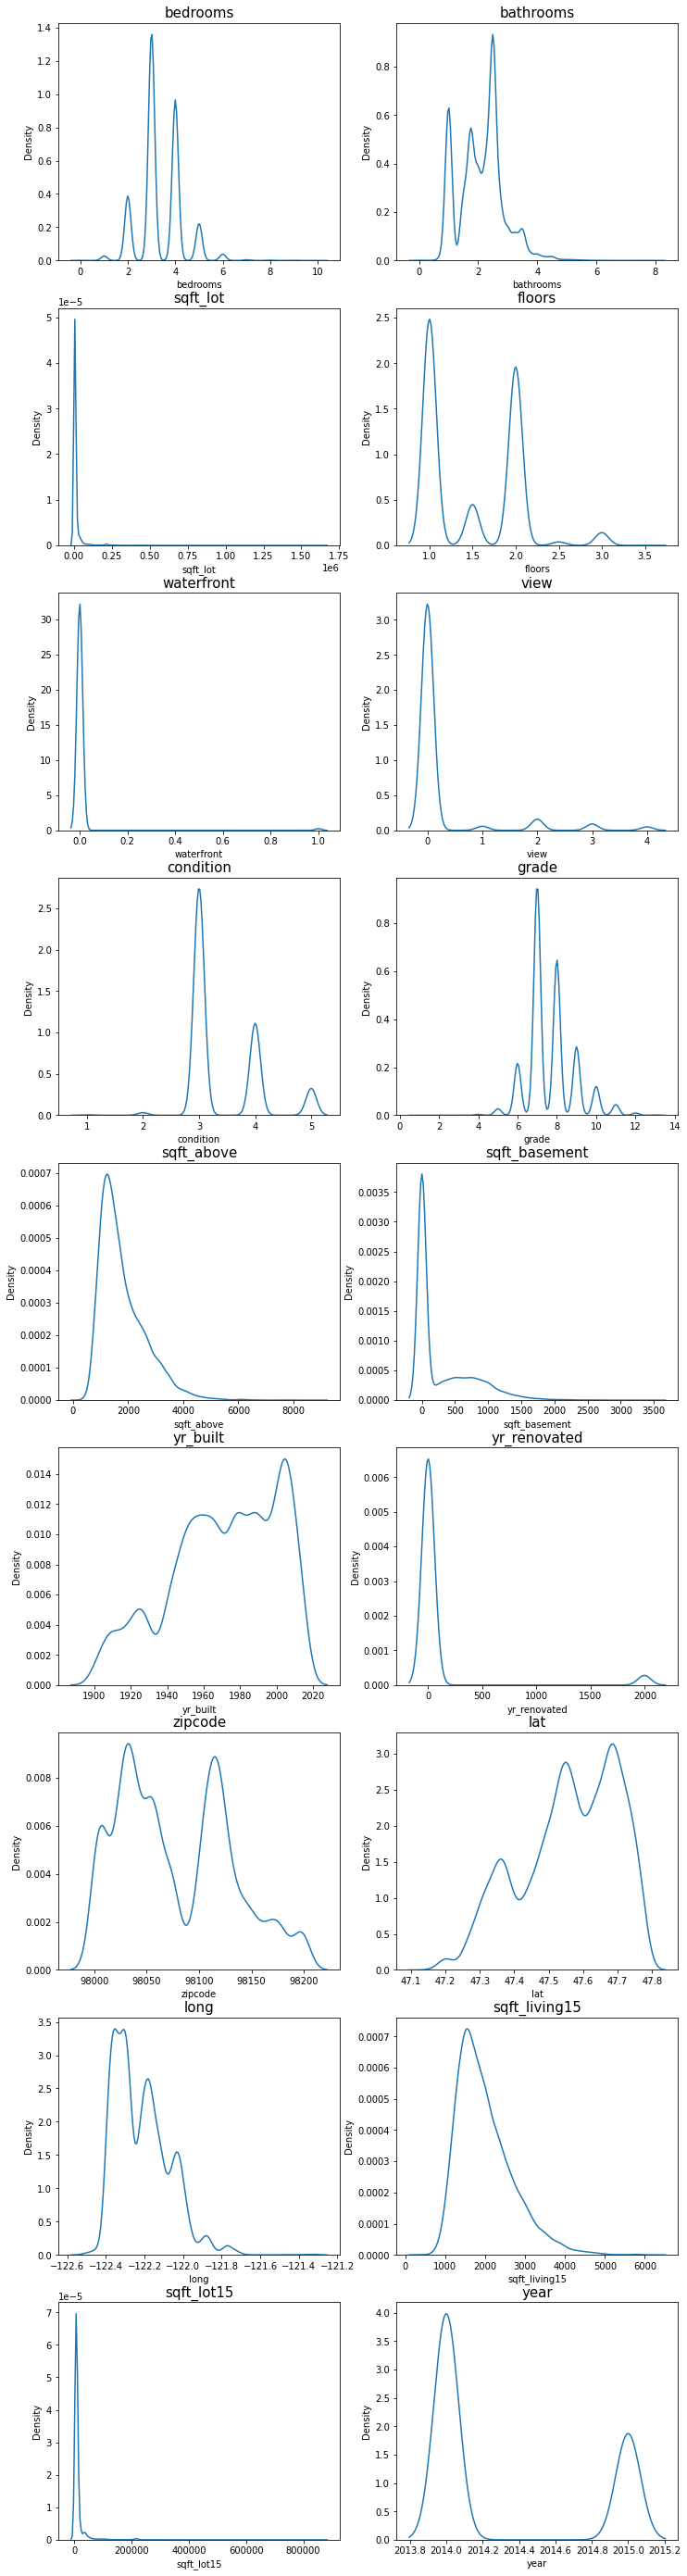

In [100]:
fig, ax = plt.subplots(9, 2, figsize=(12, 50))

count = 1
columns = train_data.columns
for row in range(9):
    for col in range(2):
        sns.kdeplot(data=train_data[columns[count]], ax=ax[row][col])
        ax[row][col].set_title(columns[count], fontsize=15)
        count += 1
        if count == 19 :
            break

In [101]:
skew_columns = ['bedrooms', 'sqft_lot', 'sqft_above','sqft_basement', 'sqft_lot15', 'sqft_living15', 'bath_sqft']

for c in skew_columns:
    train_data[c] = np.log1p(train_data[c].values)
    test_data[c] = np.log1p(test_data[c].values)

In [102]:
X_data = train_data.drop('price', axis=1)
y_data = train_data['price']
y_data = np.log1p(y_data)

### train test split

In [103]:
X_train, X_test, y_train, y_test = train_test_split(X_data, y_data, test_size=0.2, random_state=32)

In [104]:
def rmse(y_true, y_pred):
    return np.sqrt(mean_squared_error(np.expm1(y_true), np.expm1(y_pred)))

In [105]:
xgb = XGBRegressor(random_state=21)
lgb = LGBMRegressor(random_state=21)
gb = GradientBoostingRegressor(random_state=21)

In [106]:
param_grid = {
    'n_estimators': [100, 200, 400, ],
    'max_depth': [10, 20, 50, 100],
    'learning_rate' : [0.5, 0.1, 0.01],   
}

In [107]:
def my_GridSearch(model, train, y, param_grid, verbose=2, n_jobs=5):
    grid_model = GridSearchCV(model, param_grid=param_grid, \
                        scoring='neg_mean_squared_error', \
                        cv=5, verbose=verbose, n_jobs=n_jobs)

    grid_model.fit(train, y)
    params = grid_model.cv_results_['params']
    score = grid_model.cv_results_['mean_test_score']

    results = pd.DataFrame(params)
    results['score'] = score
    results['RMSLE'] = np.sqrt(-1 * results['score'])

    results = results.sort_values('RMSLE', ascending=False)

    return grid_model, results

In [108]:
lgb_model, lgb_result = my_GridSearch(lgb, X_train, y_train, param_grid)

Fitting 5 folds for each of 36 candidates, totalling 180 fits


In [109]:
y_pred = lgb_model.predict(X_test)

In [110]:
rmse(y_test, y_pred)

119036.8053570208

In [112]:
y_pred = lgb_model.predict(X_test)

In [113]:
rmse(y_test, y_pred)

119036.8053570208

### 5. 모델 제출

In [116]:
data_dir = os.getenv('HOME')+'/aiffel/kaggle_kakr_housing/data'

submission_path = os.path.join(data_dir, 'sample_submission.csv')
submission = pd.read_csv(submission_path)
submission.head()

,id,price
0,15035,100000
1,15036,100000
2,15037,100000
3,15038,100000
4,15039,100000


In [117]:
test_data.shape

(6468, 24)

In [118]:
sub_id = test_data['id']

In [119]:
test_data.drop('id', axis=1, inplace=True)

In [122]:
y_pred = lgb_model.predict(test_data)

In [123]:
y_pred = np.expm1(y_pred)

In [124]:
result = pd.DataFrame({
    'id' : sub_id, 
    'price' : y_pred
})

result.head()

,id,price
0,15035,4.716806e+05
1,15036,5.077567e+05
2,15037,1.336118e+06
3,15038,2.957820e+05
4,15039,3.293679e+05


In [125]:
my_submission_path = os.path.join(data_dir, 'submission.csv')
result.to_csv(my_submission_path, index=False)

print(my_submission_path)

/aiffel/aiffel/kaggle_kakr_housing/data/submission.csv


### 6. 회고

#### 1 ) feature engineering의 기준에 대해 잘 모르겠다. 상관관계가 높으면 무조건 피쳐로써 사용하면 되는지, 반대로 상관관계가 낮으면 피쳐를 제거해야되는지에 대한 의문점이 있다.

#### 2 ) feature engineering을 하였음에도 그다지 모델이 좋아지지 않았다. 이 부분을 더욱 연구해볼 계획이다.

### 7. 제출결과

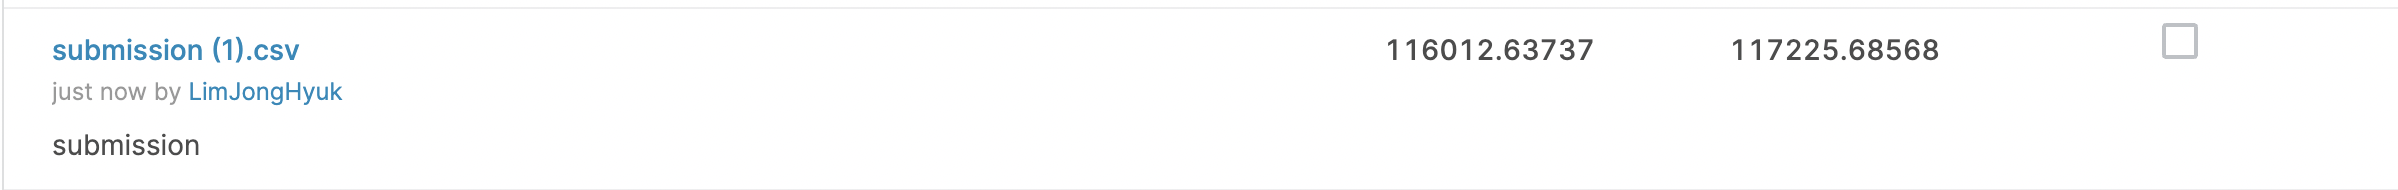